In [1]:
import pandas as pd

In [4]:
tweets = pd.read_csv('twcs.csv', encoding = 'utf-8')

In [5]:
tweets.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [6]:
first_inbound = tweets[pd.isnull(tweets.in_response_to_tweet_id) & tweets.inbound]

In [7]:
QnR = pd.merge(first_inbound, tweets, left_on = 'tweet_id', right_on = 'in_response_to_tweet_id')

In [9]:
QnR = QnR[QnR.inbound_y ^ True]

In [10]:
print(f'Data sahpe: {QnR.shape}')

Data sahpe: (794299, 14)


In [11]:
QnR.head()

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,NaN,8.0
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,NaN,8.0
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0


In [12]:
QnR = QnR[["author_id_x", "created_at_x", "text_x", "author_id_y", "created_at_y", "text_y"]]

In [13]:
QnR.head(5)

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...
1,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...
2,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...
3,115713,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...
4,115715,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",sprintcare,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...


In [19]:
amazonQnR = QnR[QnR["author_id_y"] =="AmazonHelp"]

In [20]:
amazonQnR.tail(10)['text_x']

875206                   アマゾンのプライムビデオの調子が悪い\nちょいちょい再生エラーが出る
875207                                    アマゾンを騙った架空請求SMS来た
875208    10月半ばに密林で注文したピンセットが未だに届かないんだが\nいくらなんでも遅すぎだろう\n...
875239    さっきつくったクレカが届いてAmazonプライムに早速なった〜(*⌒▽⌒*)♥幸せだ〜♥はや...
875240    @115850  there should be bonus and gifts for r...
875241    Amazonで注文したDVDがまだ届かない･･･\n昨日まで到着予定なんだけど問い合わせする...
875242    たいへん！！Amazonでピンク動画見たら請求来た！！私の消息途絶えたらAmazonに社会か...
875270    架空請求きたよww\n\nしかとショートメールでAmazon相談係。 https://t.c...
875271    Señores de @116928 estoy confuso sobre el públ...
875286    いきなり来たんだけど\nなんですかこれ！！？\n\n@120465 https://t.co...
Name: text_x, dtype: object

In [63]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [64]:
train_tweets = pd.read_csv('train_tweets.csv')
test_tweets = pd.read_csv('test_tweets.csv')

In [65]:
train_tweets

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


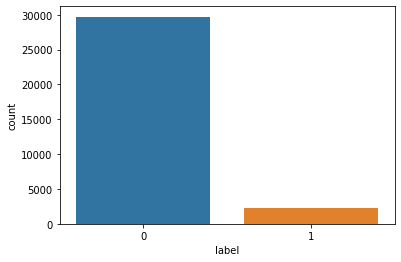

In [35]:
sns.countplot(x='label', data=train_tweets)

In [36]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

In [38]:
print(form_sentence(train_tweets['tweet'].iloc[10]))
print(train_tweets['tweet'].iloc[10])

â ireland consumer price index mom climbed from previous 0.2 to 0.5 in may blog silver gold forex
 â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex


In [40]:
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess
print(no_user_alpha(form_sentence(train_tweets['tweet'].iloc[10])))
print(train_tweets['tweet'].iloc[10])
    

['ireland', 'consumer', 'price', 'index', 'mom', 'climbed', 'previous', 'may', 'blog', 'silver', 'gold', 'forex']
 â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex


In [44]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends with whom I used to play, when you called me yesterday'.split()
print(normalization(tweet_list))

'''
['I', 'be', 'play', 'with', 'my', 'friends', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']
'''


['I', 'be', 'play', 'with', 'my', 'friends', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']


"\n['I', 'be', 'play', 'with', 'my', 'friends', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']\n"

In [47]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
import string
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

In [58]:
train_tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [59]:
train_tweets.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [66]:
train_tweets['length']  = train_tweets['tweet'].apply(len)

In [67]:
train_tweets.head()

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

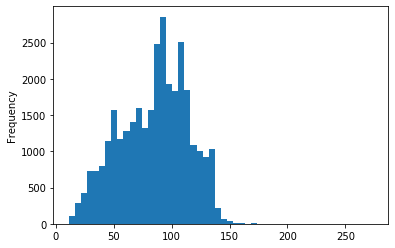

In [69]:
train_tweets['length'].plot(bins=50,kind = 'hist')

In [70]:
train_tweets['length'].describe()

count    31962.000000
mean        84.739628
std         29.455749
min         11.000000
25%         63.000000
50%         88.000000
75%        108.000000
max        274.000000
Name: length, dtype: float64

In [74]:
train_tweets[train_tweets['length'] == 100]['tweet'].iloc[0]

"product of the day: happy man #wine tool  who's   it's the #weekend? time to open up &amp; drink up!"

In [75]:
import string

In [76]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [77]:
train_tweets.head()

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [78]:
train_tweets['tweet'].head(5).apply(text_process)

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, lyft, credit, cant, use, ...
2                                    [bihday, majesty]
3    [model, love, u, take, u, time, urð±, ðð...
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
bow_transformer = CountVectorizer(analyzer=text_process)

In [81]:
bow_transformer.fit(train_tweets['tweet'])

CountVectorizer(analyzer=<function text_process at 0x000002179A2C3730>)

In [82]:
msg4 = train_tweets['tweet']

In [83]:
print(msg4)

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object


In [84]:
bow4 = bow_transformer.transform([msg4])

In [85]:
print(bow4)

  (0, 0)	5
  (0, 6)	2
  (0, 7)	1
  (0, 10)	1
  (0, 11)	1
  (0, 13)	1
  (0, 15)	1
  (0, 19)	1
  (0, 20)	1
  (0, 27)	1
  (0, 33)	1
  (0, 36)	1
  (0, 37)	1
  (0, 42)	1
  (0, 45)	1
  (0, 48)	1
  (0, 58)	1
  (0, 66)	1
  (0, 78)	1
  (0, 79)	199
  (0, 80)	79
  (0, 81)	27
  (0, 82)	8
  (0, 84)	3
  (0, 87)	2
  :	:
  (0, 47355)	1
  (0, 47356)	1
  (0, 47357)	1
  (0, 47358)	2
  (0, 47359)	2
  (0, 47361)	1
  (0, 47362)	2
  (0, 47363)	2
  (0, 47364)	1
  (0, 47366)	1
  (0, 47368)	1
  (0, 47369)	1
  (0, 47370)	1
  (0, 47371)	1
  (0, 47372)	1
  (0, 47375)	1
  (0, 47377)	3
  (0, 47378)	1
  (0, 47379)	1
  (0, 47380)	1
  (0, 47381)	1
  (0, 47382)	1
  (0, 47383)	4
  (0, 47384)	1
  (0, 47385)	1


In [86]:
print (bow_transformer.get_feature_names()[100])

100daysofcode


In [87]:
messages_bow = bow_transformer.transform(train_tweets['tweet'])

In [88]:
print ('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (31962, 47386)


In [89]:
print ('Amount of Non-Zero occurences: ', messages_bow.nnz)

Amount of Non-Zero occurences:  264168


In [90]:
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz /
                             (messages_bow.shape[0] * messages_bow.shape[1])))

sparsity: 0.02%


In [93]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [94]:
tfidf4 = tfidf_transformer.transform(bow4)

In [95]:
print (tfidf4)

  (0, 47385)	0.00040531493588156635
  (0, 47384)	0.00040531493588156635
  (0, 47383)	0.0015160296720306088
  (0, 47382)	0.00040531493588156635
  (0, 47381)	0.00040531493588156635
  (0, 47380)	0.00040531493588156635
  (0, 47379)	0.00040531493588156635
  (0, 47378)	0.00040531493588156635
  (0, 47377)	0.001169778073314825
  (0, 47375)	0.00040531493588156635
  (0, 47372)	0.00040531493588156635
  (0, 47371)	0.00040531493588156635
  (0, 47370)	0.00040531493588156635
  (0, 47369)	0.00040531493588156635
  (0, 47368)	0.00040531493588156635
  (0, 47366)	0.00040531493588156635
  (0, 47364)	0.00040531493588156635
  (0, 47363)	0.00077985204887655
  (0, 47362)	0.0008106298717631327
  (0, 47361)	0.00040531493588156635
  (0, 47359)	0.0008106298717631327
  (0, 47358)	0.00077985204887655
  (0, 47357)	0.00040531493588156635
  (0, 47356)	0.00040531493588156635
  (0, 47355)	0.00040531493588156635
  :	:
  (0, 87)	0.00077985204887655
  (0, 84)	0.001169778073314825
  (0, 82)	0.0027538461681869894
  (0, 81)	0.

In [96]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

4.80285284239482


In [97]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

7.522186661099058


In [98]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [99]:
print (messages_tfidf.shape)

(31962, 47386)


In [101]:
from sklearn.naive_bayes import *

In [102]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer =text_process)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',MultinomialNB())])

In [105]:
from sklearn.model_selection import train_test_split

In [107]:
msg_train, msg_test, label_train, label_test = \
train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)

In [108]:
print (len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

25569 6393 31962


In [109]:
from sklearn.pipeline import Pipeline

In [110]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer =text_process)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',MultinomialNB())])

In [111]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002179A2C3730>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [112]:
predictions = pipeline.predict(msg_test)

In [114]:
print (classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6332
           1       0.14      1.00      0.24        61

    accuracy                           0.94      6393
   macro avg       0.57      0.97      0.60      6393
weighted avg       0.99      0.94      0.96      6393

